<a href="https://colab.research.google.com/github/naveenkumar1805/capstone_project-3-classification-/blob/main/mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is. 
# Data Description -
# Battery_power - Total energy a battery can store in one time measured in mAh
# Blue - Has bluetooth or not
# Clock_speed - speed at which microprocessor executes instructions
# Dual_sim - Has dual sim support or not
# Fc - Front Camera mega pixels
# Four_g - Has 4G or not
# Int_memory - Internal Memory in Gigabytes
# M_dep - Mobile Depth in cm
#Mobile_wt - Weight of mobile phone
# N_cores - Number of cores of processor
# Pc - Primary Camera mega pixels
# Px_height - Pixel Resolution Height
# Px_width - Pixel Resolution Width
# Ram - Random Access Memory in Mega Bytes
# Sc_h - Screen Height of mobile in cm
# Sc_w - Screen Width of mobile in cm
# Talk_time - longest time that a single battery charge will last when you are
# Three_g - Has 3G or not
# Touch_screen - Has touch screen or not
# Wifi - Has wifi or not
# Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

In [1]:
# import drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/capstone project-3 (classification)/data_mobile_price_range.csv')

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.shape

(2000, 21)

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Some Basic Observations:

We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [10]:
print(df[df['pc']==0].shape[0])

101


In [11]:
# Checking How many observations having screen width value as 0.
print(df[df['sc_w']==0].shape[0])

180


In [12]:
# Checking How many observations having px_hieght value as 0.
print(df[df['px_height']==0].shape[0])

2


In [13]:
# As there are only 2 observations having px_height=0. so we will drop it.
df=df[df['px_height']!=0]

In [14]:
df.shape

(1998, 21)

In [15]:
col_names = ['sc_w','pc']
df.loc[:,['sc_w','pc']]

,sc_w,pc
0,7,2
1,3,6
2,2,6
3,8,9
4,2,14
...,...,...
1995,4,14
1996,10,3
1997,1,3
1998,10,5


# **Nearest Neighbors Imputations (KNNImputer)**

In [16]:
#df.loc[:,['sc_w','pc']].replace(0,np.nan)

In [17]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)
df['pc']=df['pc'].replace(0,np.nan)

In [18]:
# import KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [19]:
df.shape

(1998, 21)

In [20]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape[0]

0

In [21]:
df[df['pc']==0].shape[0]

0

In [22]:
df['pc'].unique()

array([ 2.,  6.,  9., 14.,  7., 10., 15.,  1., 18., 17., 11., 16.,  4.,
       20., 13.,  3., 19.,  8.,  5., 12.])

In [23]:
df['sc_w'].unique()

array([ 7.,  3.,  2.,  8.,  1., 10.,  9., 15., 13.,  5., 11.,  4., 12.,
        6., 17., 14., 16., 18.])

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1998.0,1238.391391,439.369721,501.0,851.25,1226.0,1615.00,1998.0
blue,1998.0,0.494995,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,1998.0,1.521722,0.816240,0.5,0.70,1.5,2.20,3.0
dual_sim,1998.0,0.510010,0.500025,0.0,0.00,1.0,1.00,1.0
fc,1998.0,4.308809,4.343101,0.0,1.00,3.0,7.00,19.0
four_g,1998.0,0.521021,0.499683,0.0,0.00,1.0,1.00,1.0
int_memory,1998.0,32.057558,18.141468,2.0,16.00,32.0,48.00,64.0
m_dep,1998.0,0.501902,0.288411,0.1,0.20,0.5,0.80,1.0
mobile_wt,1998.0,140.262763,35.404007,80.0,109.00,141.0,170.00,200.0
n_cores,1998.0,4.519019,2.287627,1.0,3.00,4.0,7.00,8.0


In [25]:
df.nunique()

battery_power    1093
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 20
px_height        1136
px_width         1109
ram              1561
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [26]:
bool_cols =df[[col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]]
bool_cols


,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
1993,1.0,1.0,1.0,1.0,1.0,0.0
1994,1.0,1.0,0.0,1.0,1.0,1.0
1995,0.0,1.0,1.0,1.0,1.0,0.0
1996,0.0,0.0,1.0,1.0,1.0,1.0


In [27]:
new_data = df.drop(bool_cols, axis=1)
new_data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842.0,2.2,1.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,1.0
1,1021.0,0.5,0.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,2.0
2,563.0,0.5,2.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,2.0
3,615.0,2.5,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,2.0
4,1821.0,1.2,13.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,794.0,0.5,0.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,0.0
1994,1965.0,2.6,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,2.0
1995,1911.0,0.9,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,3.0
1996,1512.0,0.9,4.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,0.0


In [28]:
bool_cols['blue'].value_counts()

0.0    1009
1.0     989
Name: blue, dtype: int64

In [29]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [30]:
df['four_g'].value_counts()

1.0    1041
0.0     957
Name: four_g, dtype: int64

In [31]:
df['three_g'].value_counts()

1.0    1521
0.0     477
Name: three_g, dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

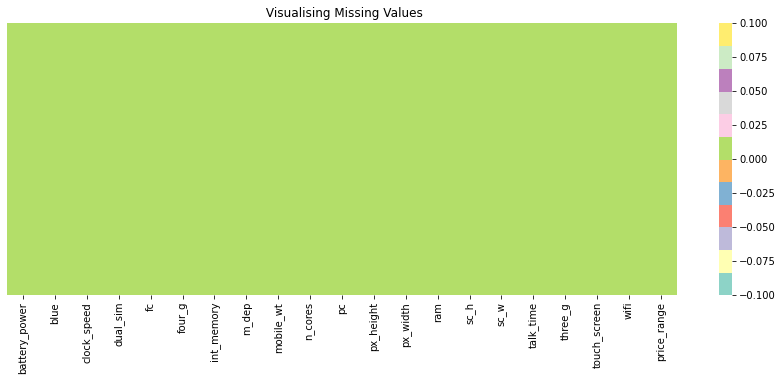

In [32]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='Set3',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [33]:
price_range=df['price_range'].value_counts()

Text(0.5, 1.0, 'price range distribution')

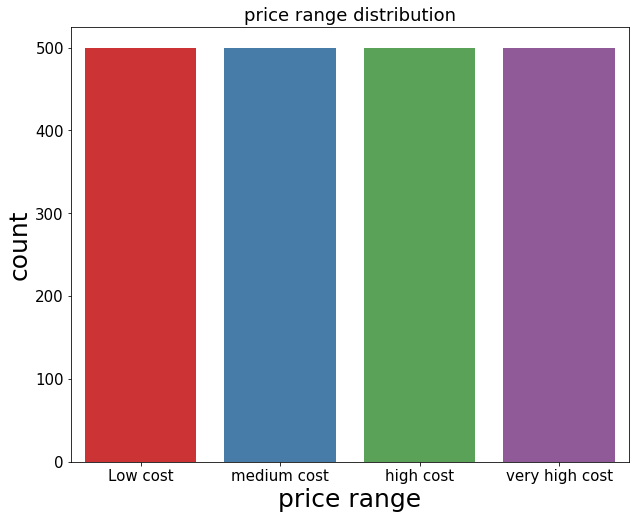

In [34]:
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = '15'
#sns.countplot(x="price_range",data=df,palette='hls',hue='price_range')
sns.countplot(x="price_range",data=df,palette='Set1')
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.xlabel('price range', size=25)
plt.ylabel('count', size=25)
plt.title('price range distribution')

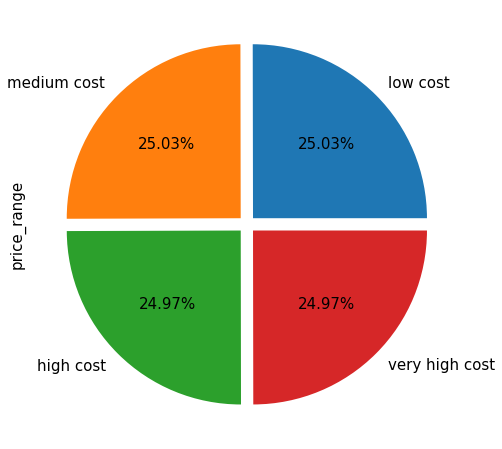

In [35]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]

price_range.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.2f%%',figsize=(12,8),fontsize=15)

Text(0.5, 1.0, ' price range  Vs  internal memory')

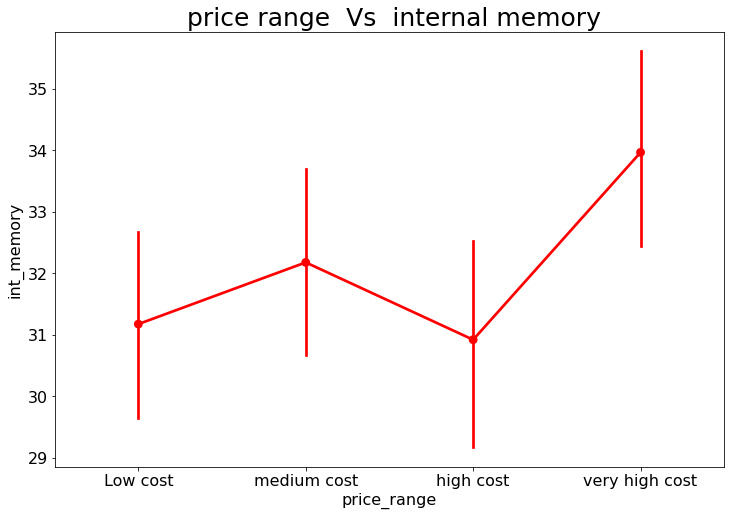

In [36]:
plt.figure(figsize = (12,8))
plt.rcParams['font.size'] = '16'
sns.pointplot(x=df['price_range'],y = df['int_memory'],data = df,color='r')
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])

plt.title(' price range  Vs  internal memory', size=25)

In [37]:
bool_cols.columns


Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')

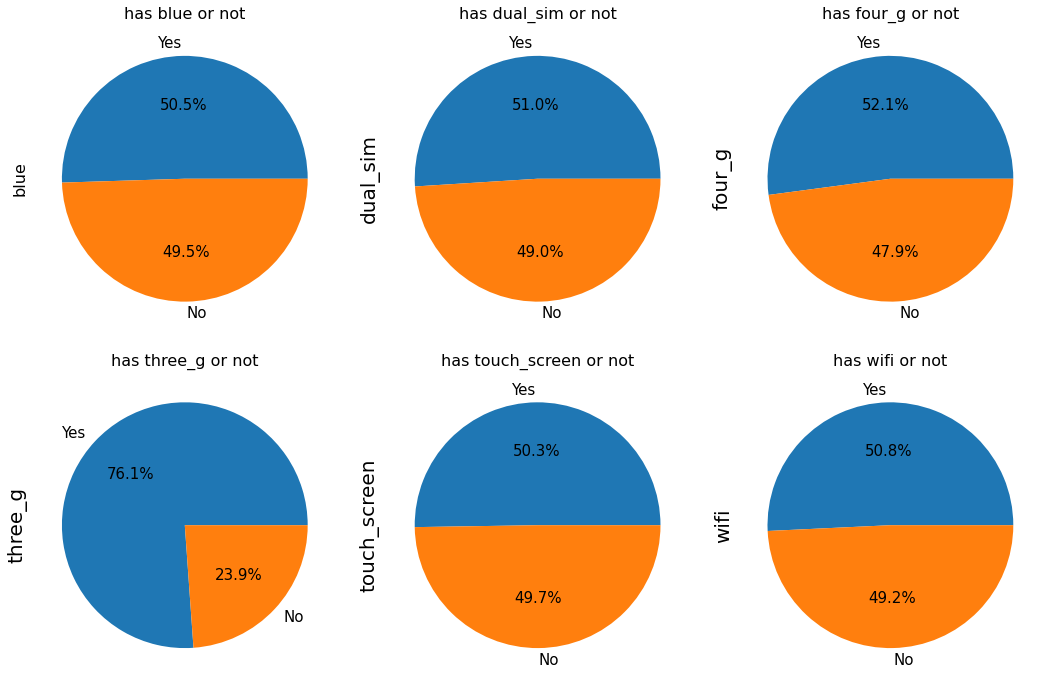

In [38]:
plt.figure(figsize=(15,10))
rows=2
col=3
count=1
#var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in bool_cols:
  plt.subplot(rows,col,count)
  bool_cols[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=15,labels=labels)
  plt.rcParams['font.size'] = '20'
  plt.title(f'has {var} or not',fontsize=16)
  plt.tight_layout()
  count=count+1

# Relation Between RAM,Battery_power,px_height and px_width

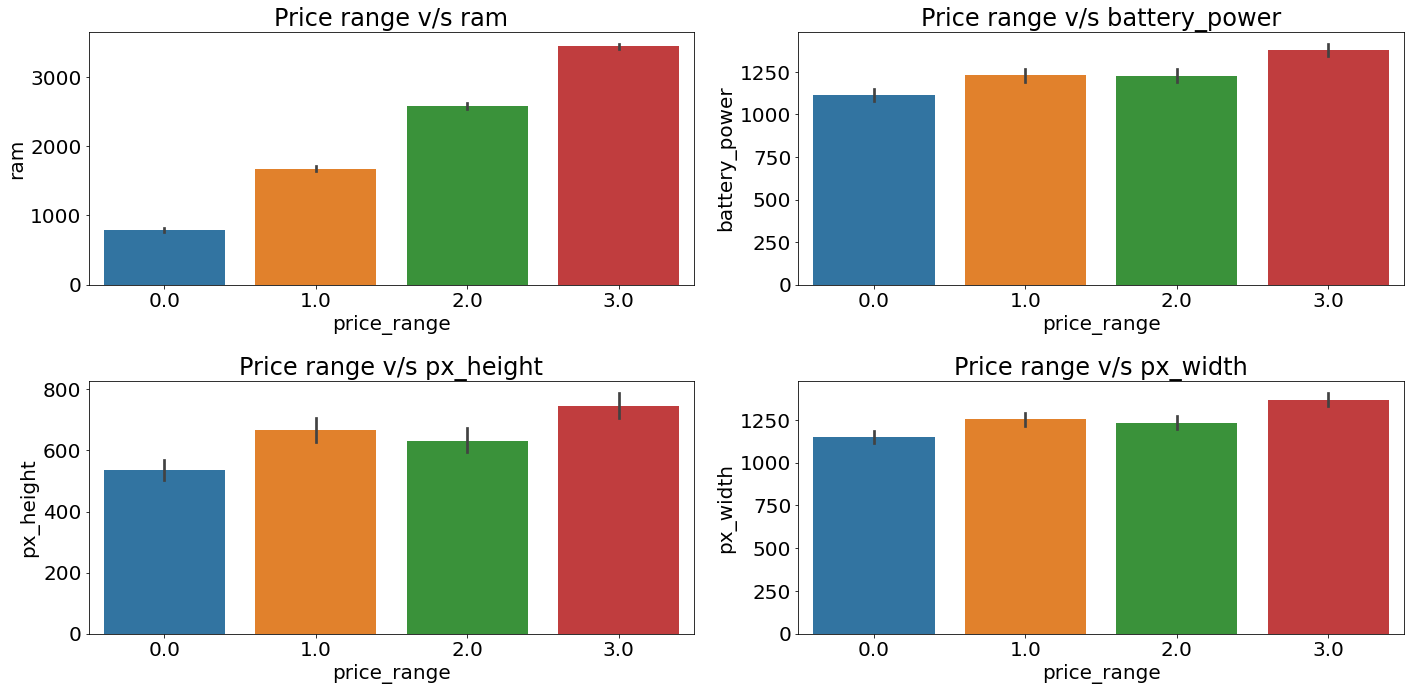

In [39]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for col in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[col])
  plt.title(f'Price range v/s {col}')
  counter=counter+1
  plt.tight_layout()

# **Mobiles with both 3G and 4G.**

In [40]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=df[(df['three_g']==1) & (df['four_g']==1)]

In [41]:
x=three_g_and_4g_df['price_range'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


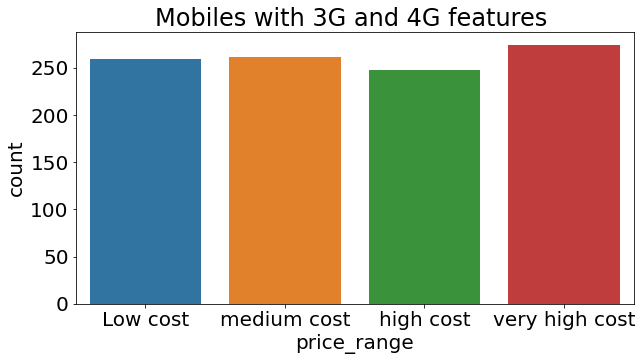

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

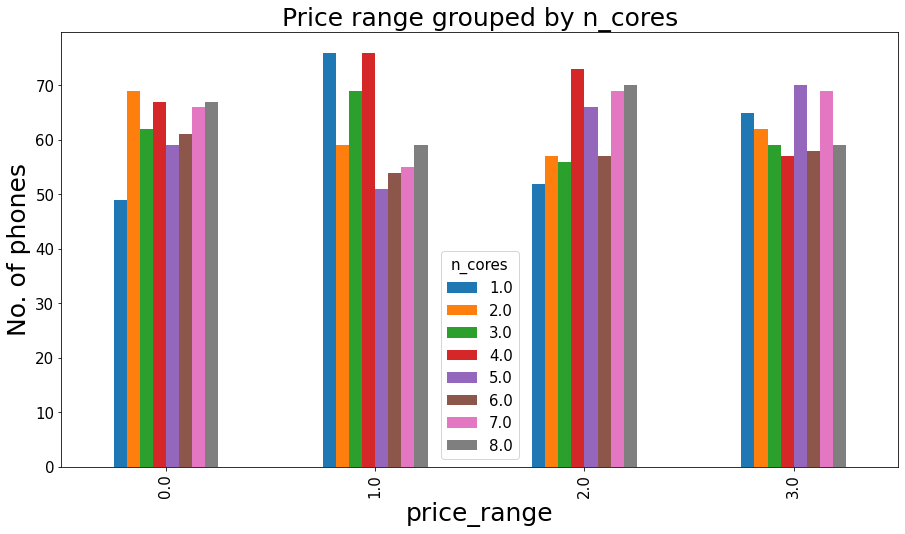

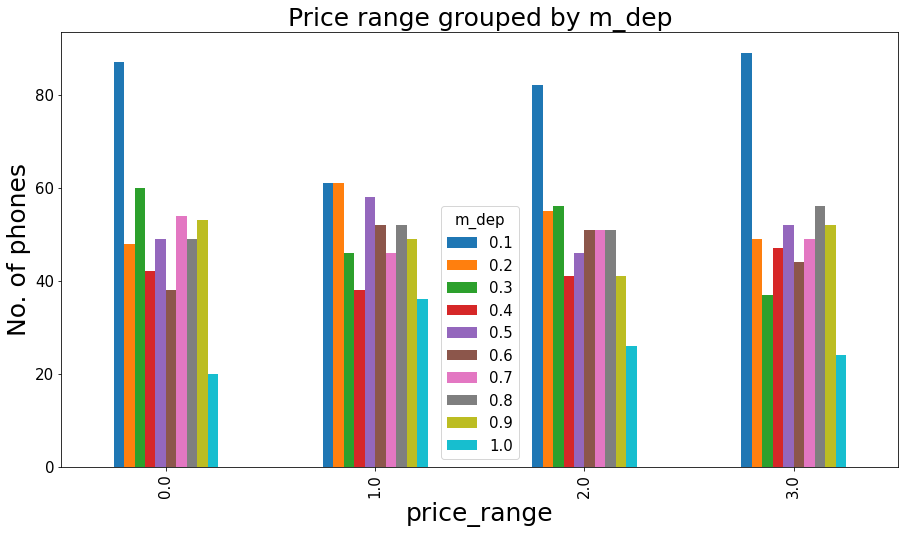

In [43]:
list_ordinal=['n_cores','m_dep']
#plt.figure(figsize=(20,20))
plt.rcParams['font.size'] = '15'
for item in list_ordinal:
  
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,8))
  plt.title(f'Price range grouped by {item}',size=25)
  plt.xlabel('price_range', size=25)
  plt.ylabel('No. of phones',size=25)

# Number of phone with Front camera and primary camera

Text(0.5, 0, 'MegaPixels')

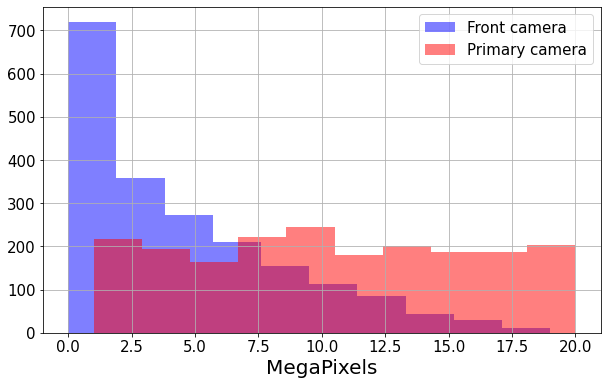

In [44]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels',size=20)

# **Let's Check which numerical feature is driving the price range most.**

In [45]:
new_data.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

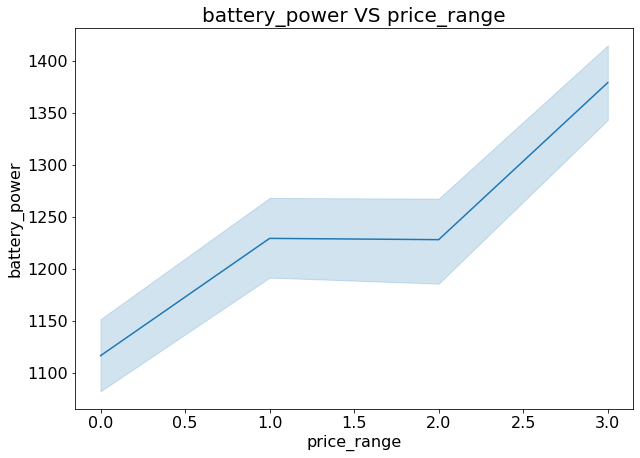

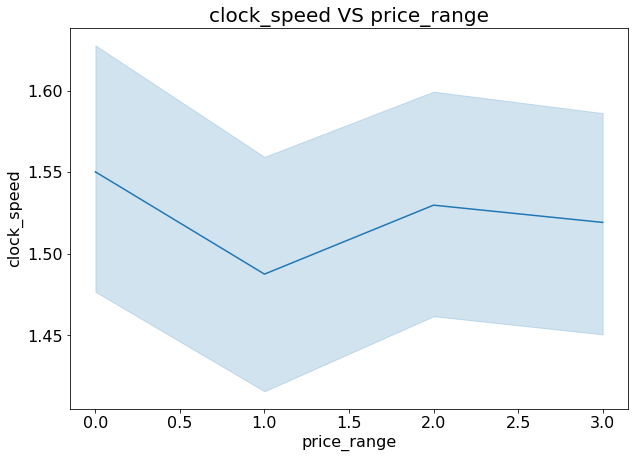

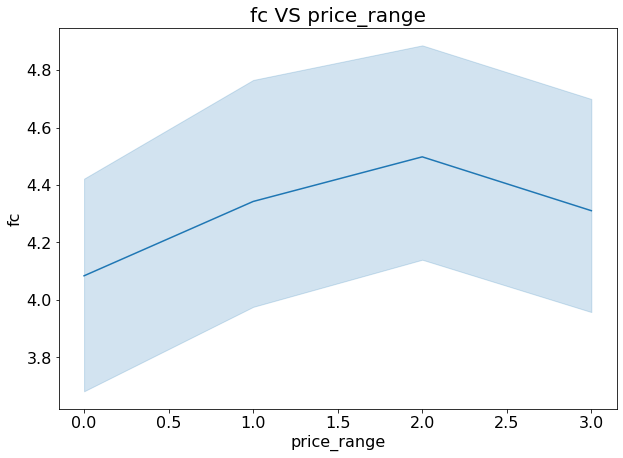

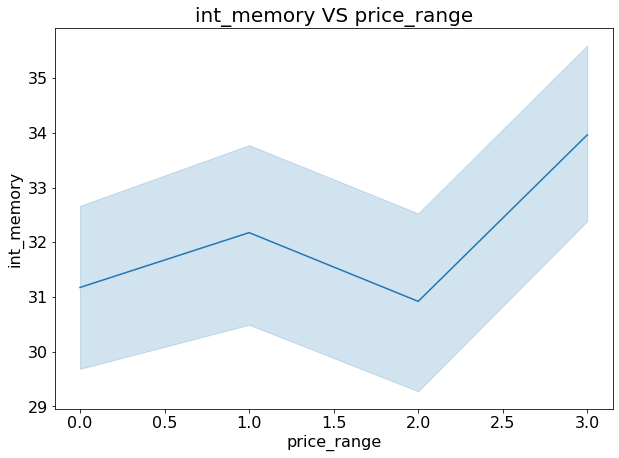

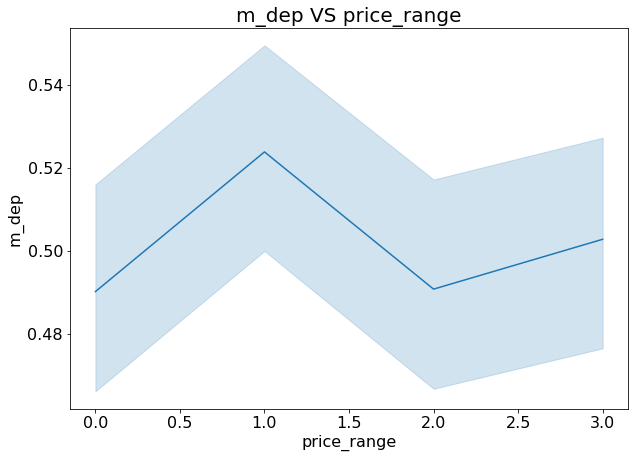

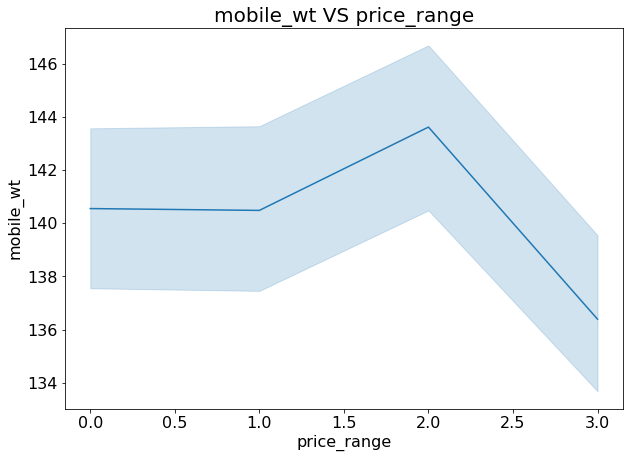

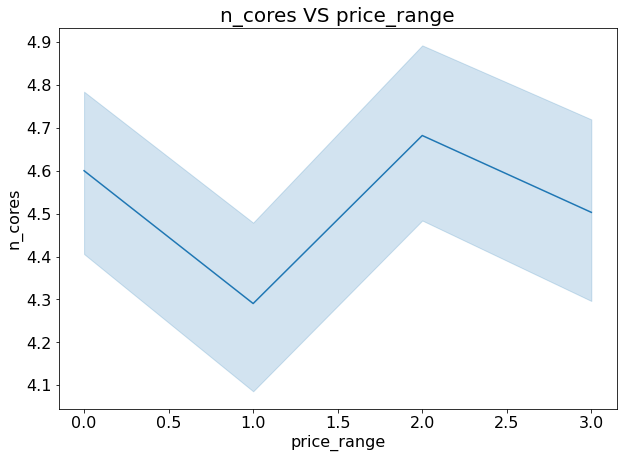

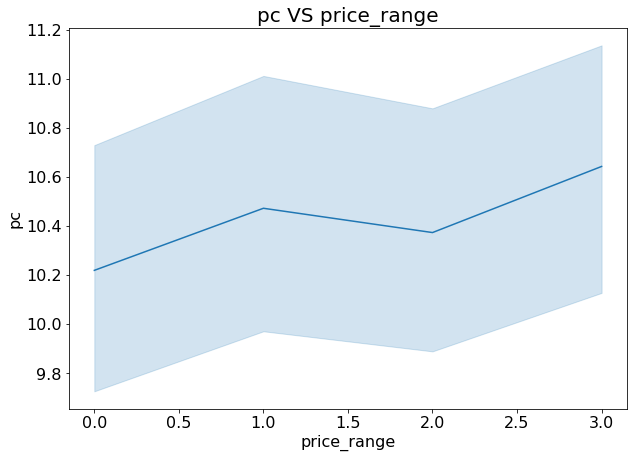

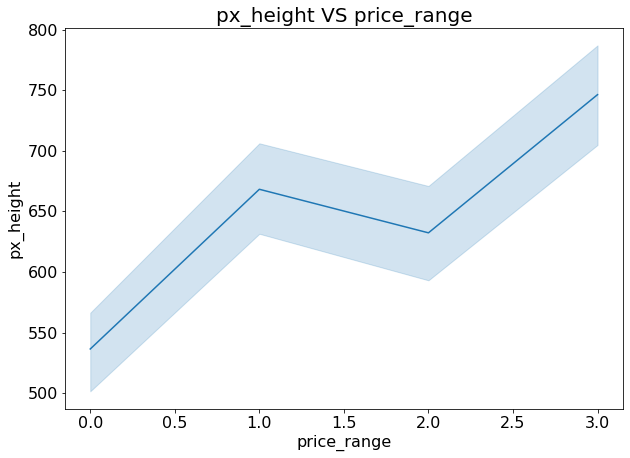

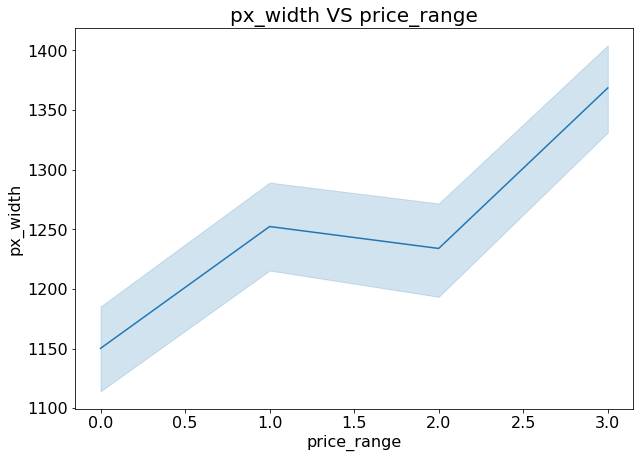

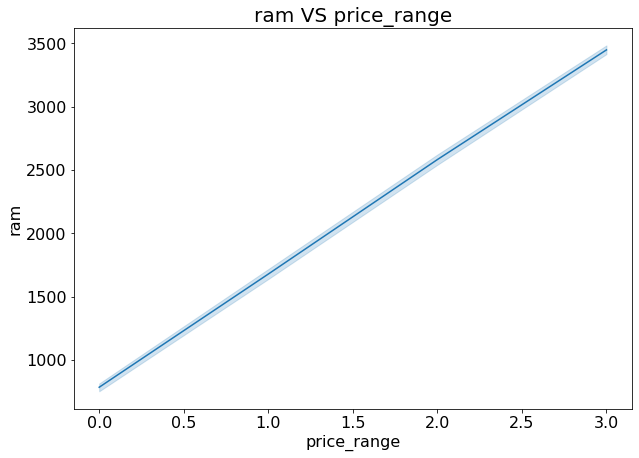

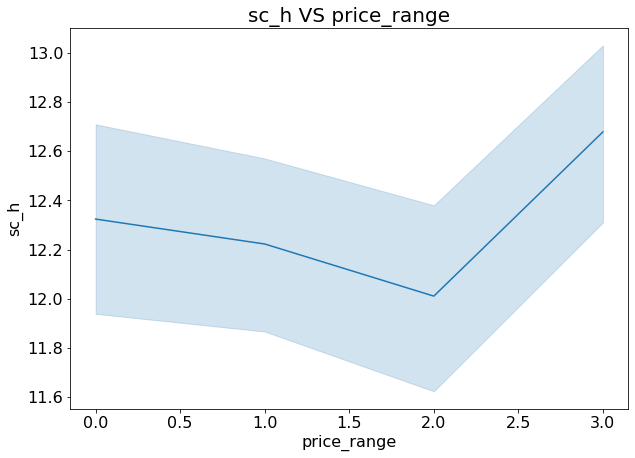

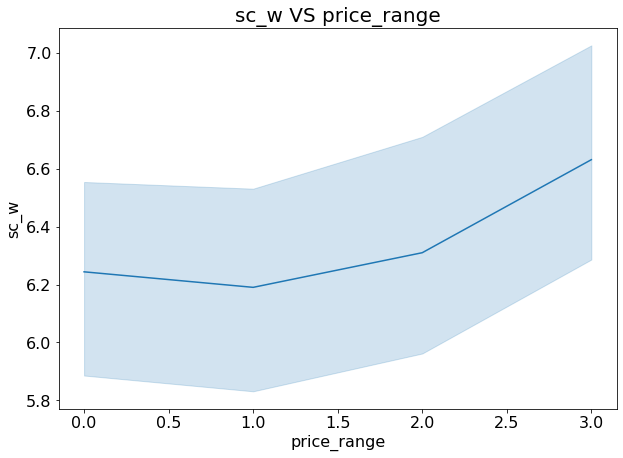

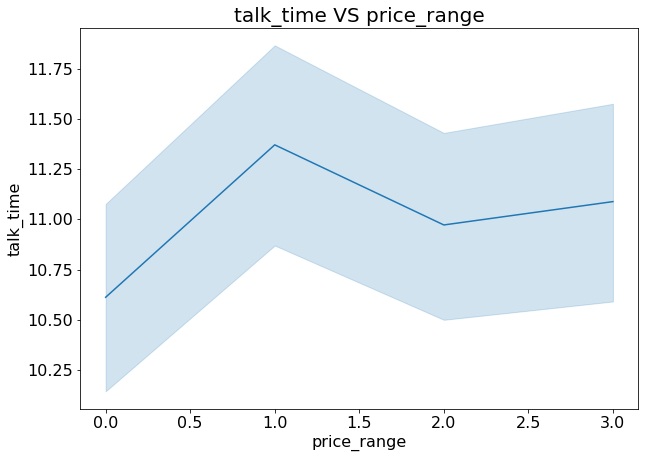

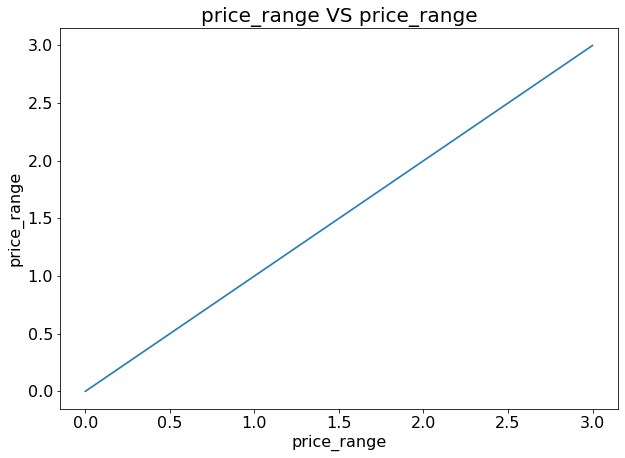

In [46]:
#list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
#counter=1
for var in new_data:
    plt.figure(figsize=(10,7))
    plt.rcParams['font.size'] = '16'
    sns.lineplot(x=df['price_range'],y=df[var])
    plt.title(f'{var} VS price_range',fontsize=20)


# **Let's Check the distribution of numerical columns and Outliers.**

In [47]:
new_data.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [48]:
numeric_col=new_data.columns.drop('price_range')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


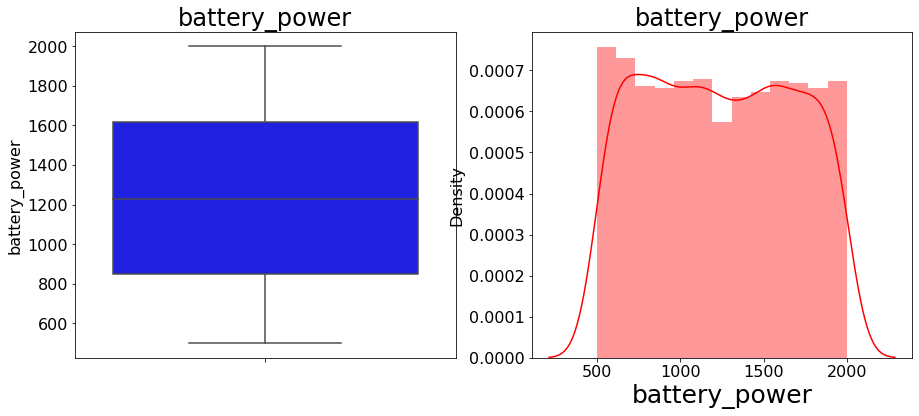

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


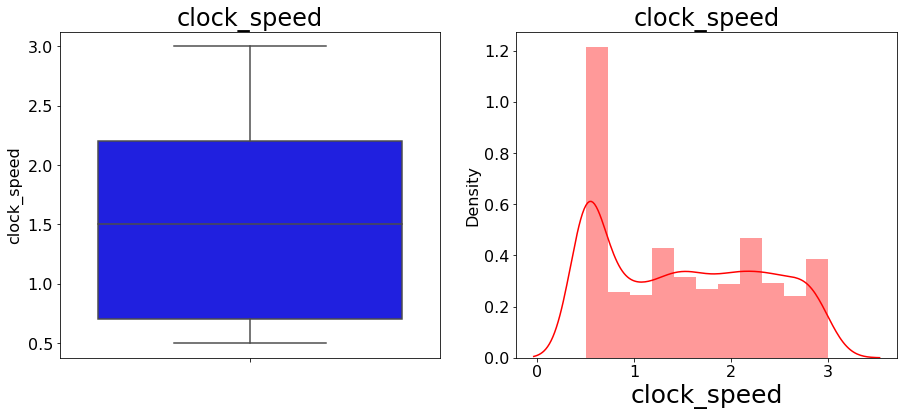

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


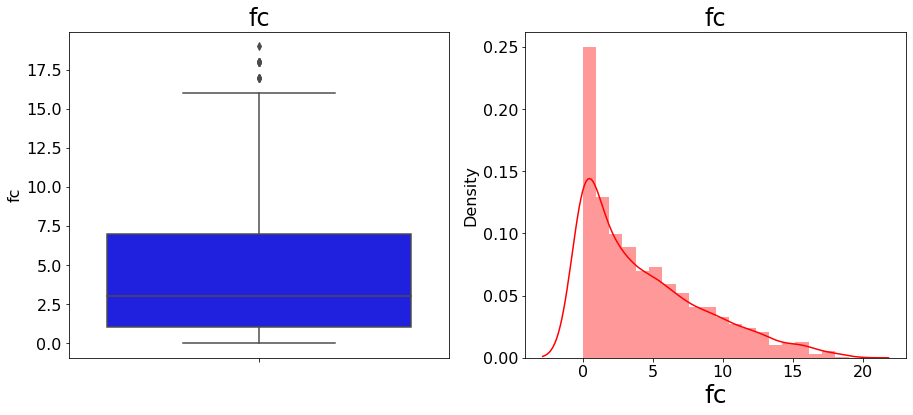

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


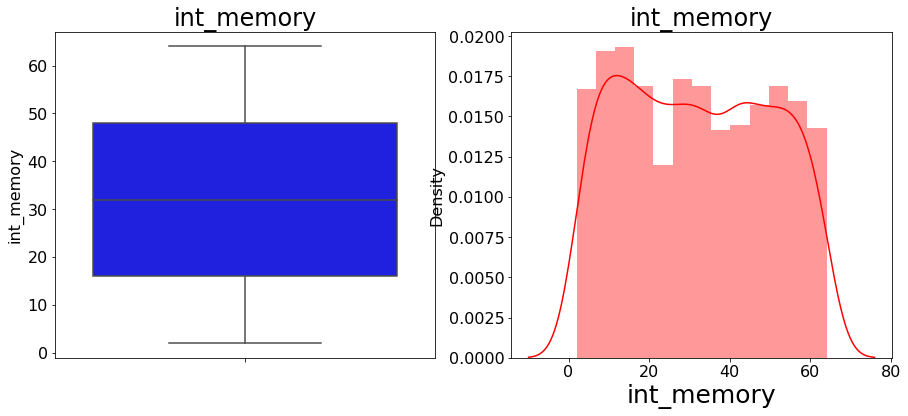

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


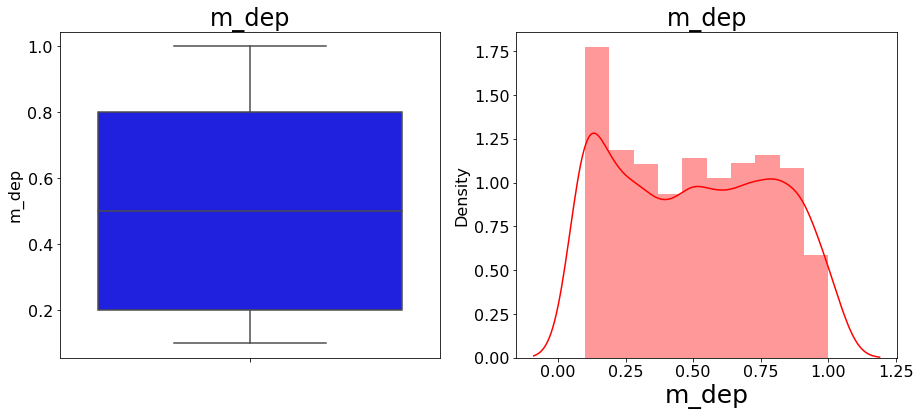

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


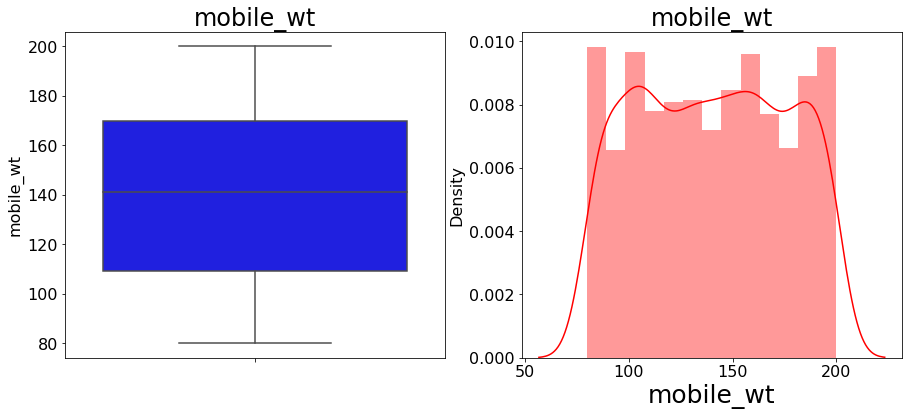

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


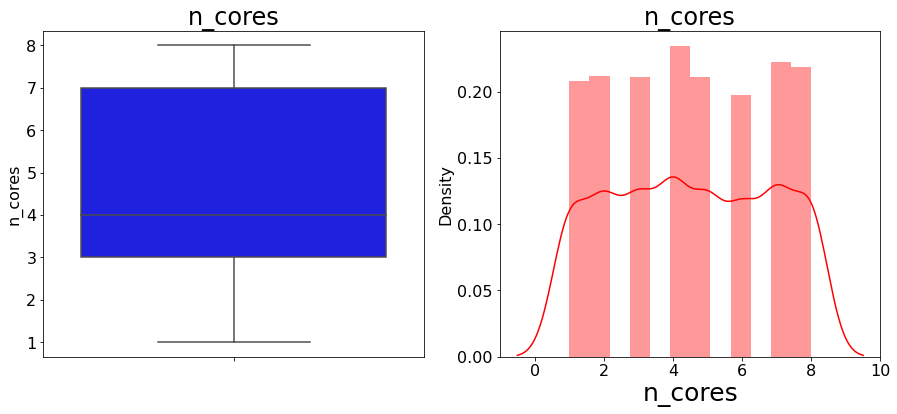

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


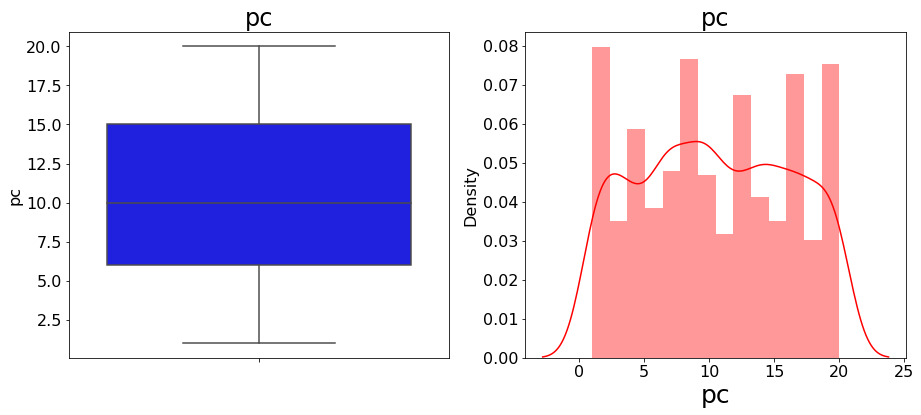

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


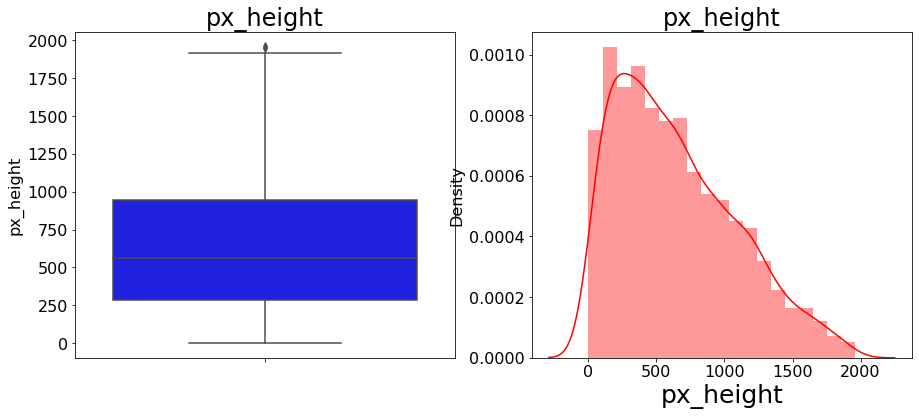

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


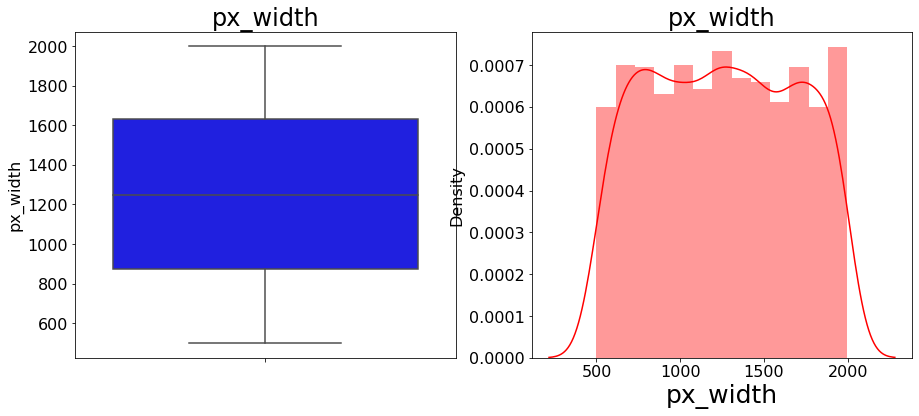

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


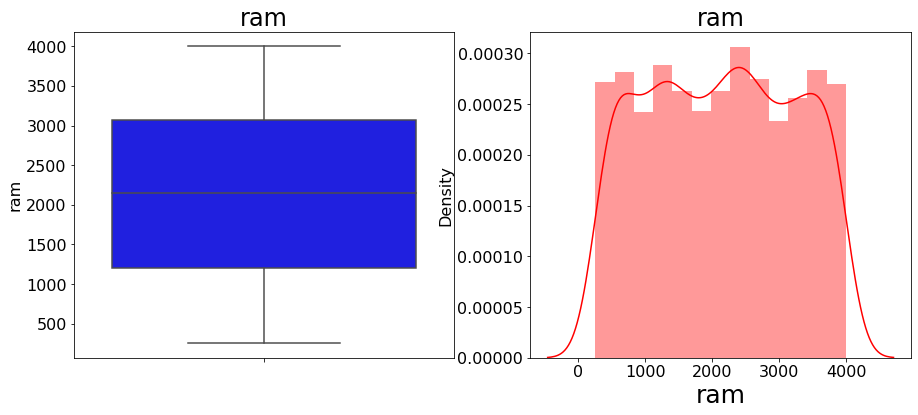

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


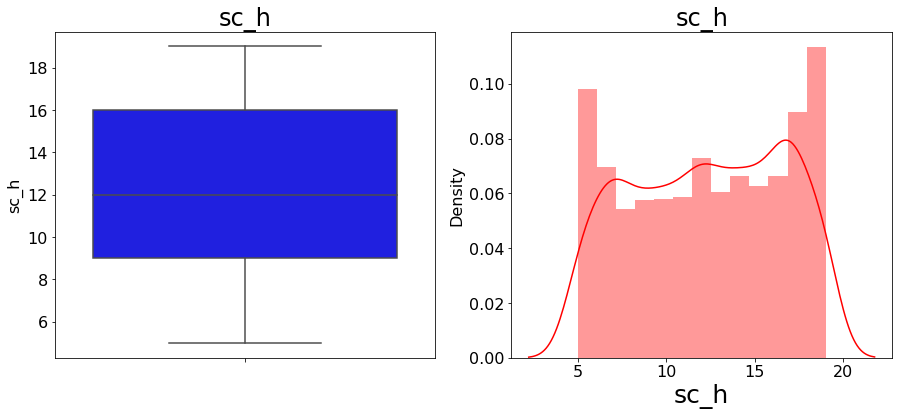

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


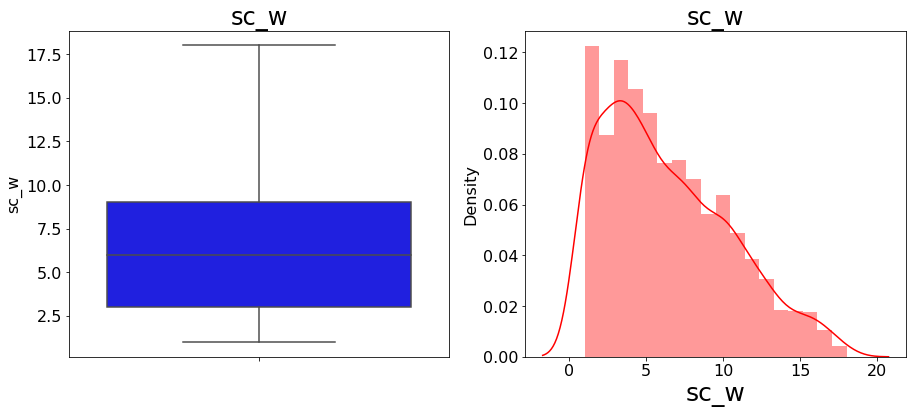

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


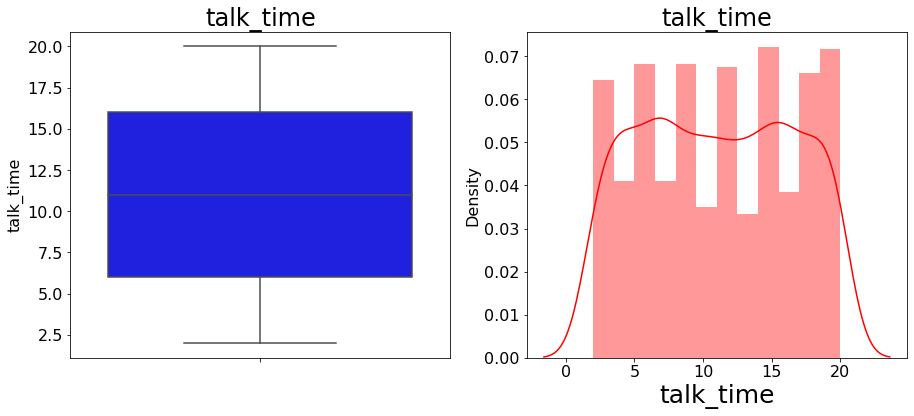

In [49]:
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='blue')
    fig.set_title(f'{var}',size=24)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='red')
    fig.set_title(f'{var}',size=24)
    fig.set_xlabel(var,size=25)

    plt.show()

# as we observed:

1.   Data is well distrubted.
2.   fc and px_height has some outliers.


# Outlier Treatment.

In [50]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.99)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [51]:
Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.99)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


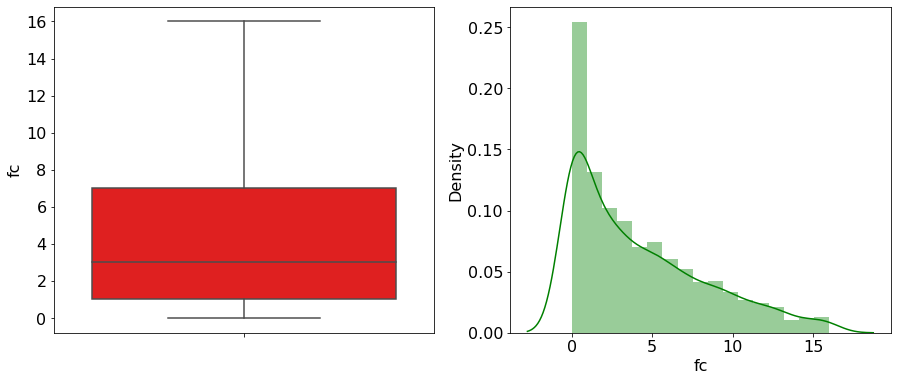

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


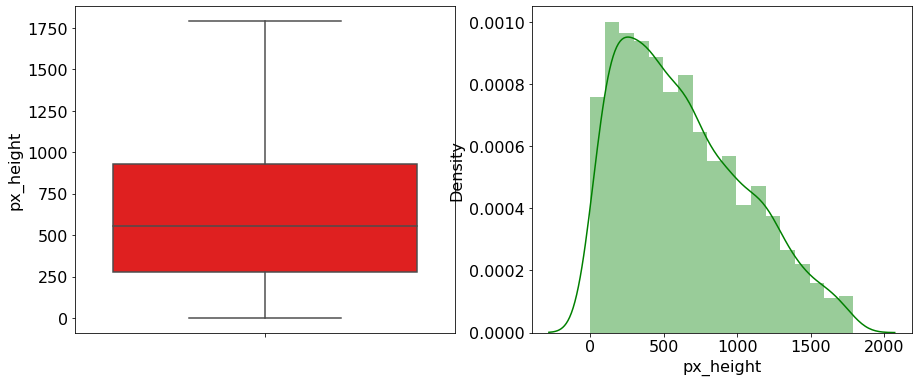

In [52]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()


In [53]:
df.shape

(1961, 21)

In [54]:
# create copy of mobile_data\n",
df=df.copy()

In [55]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


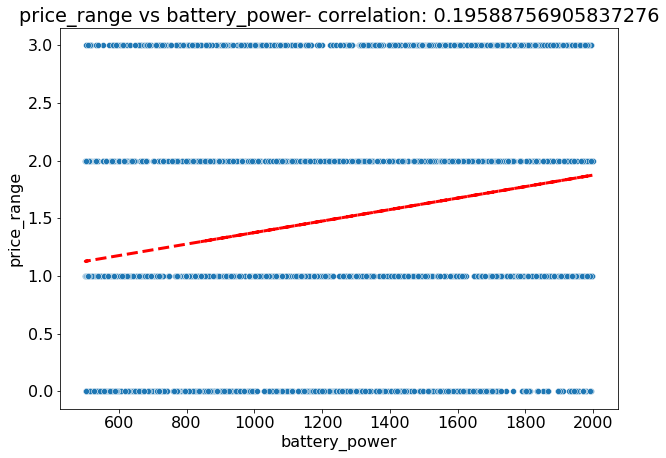

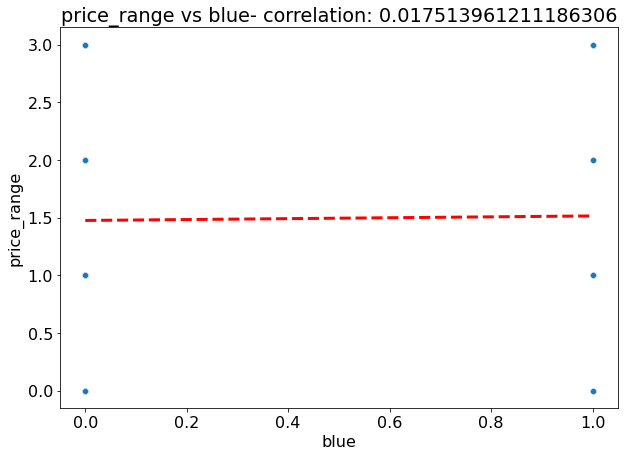

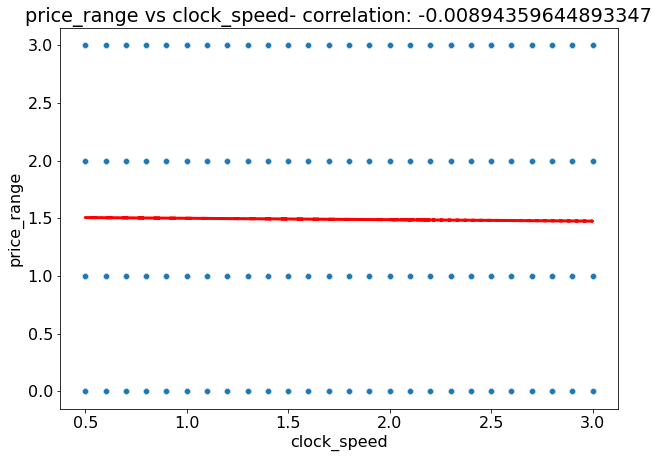

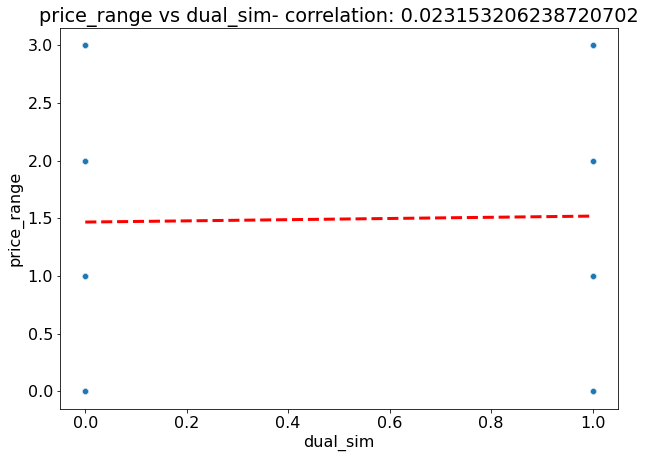

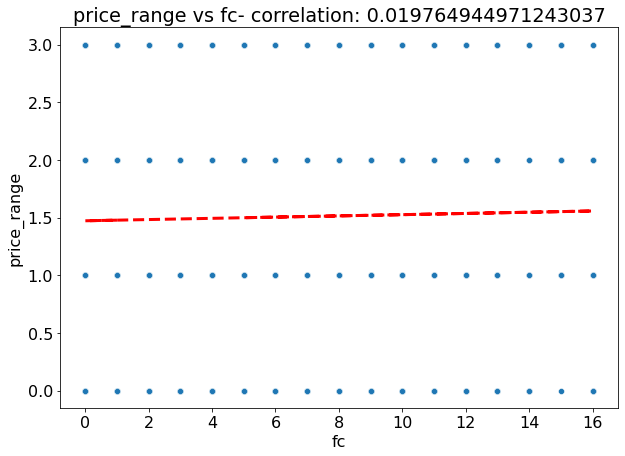

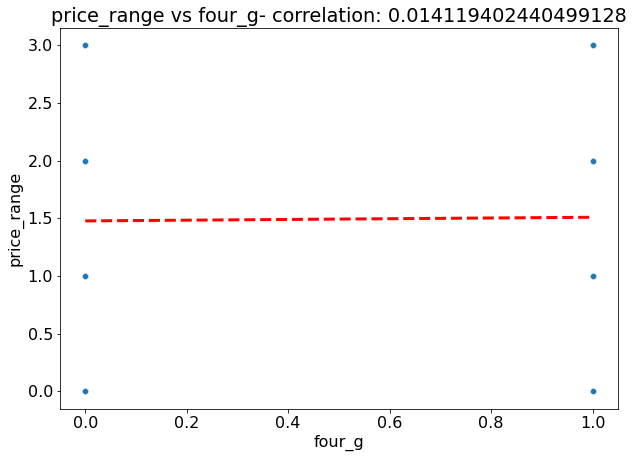

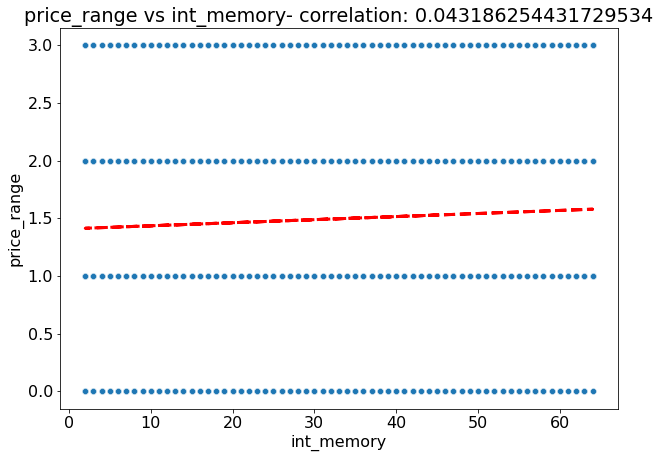

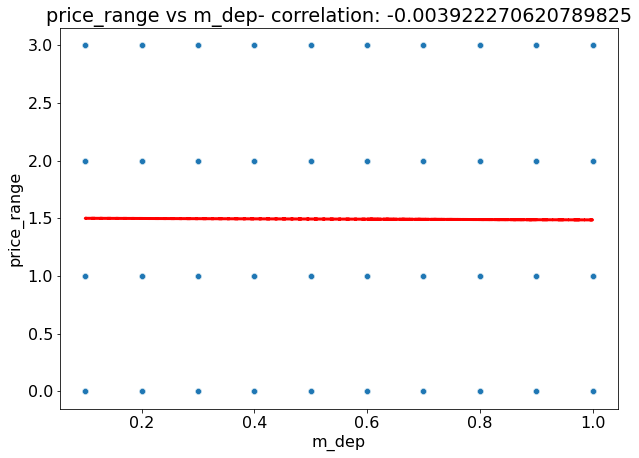

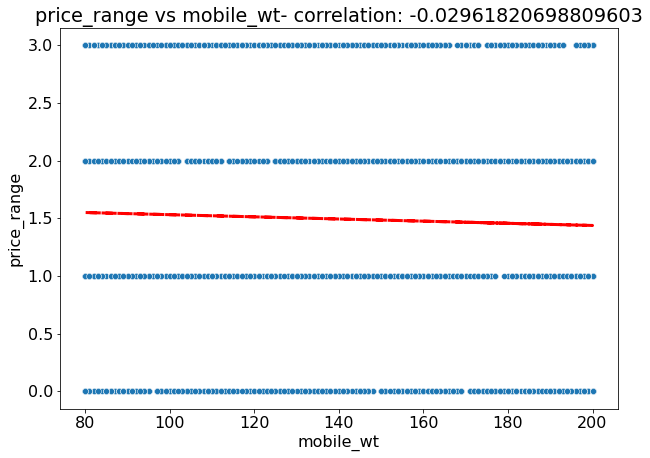

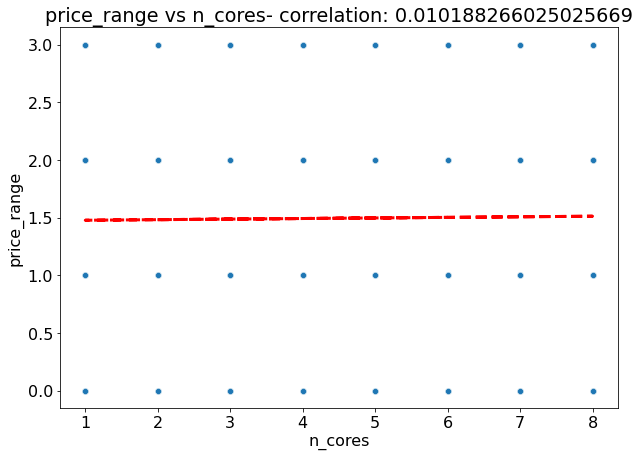

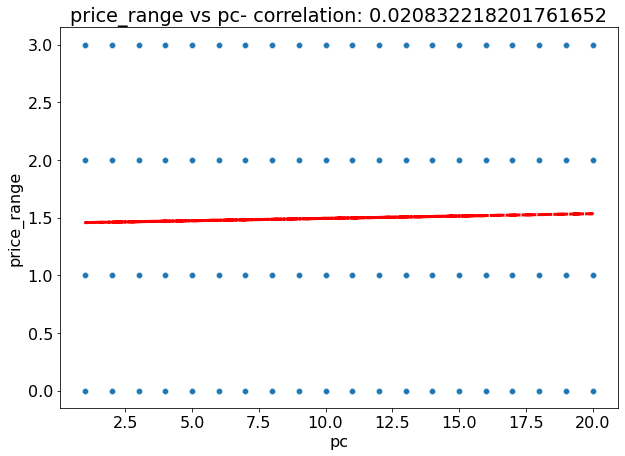

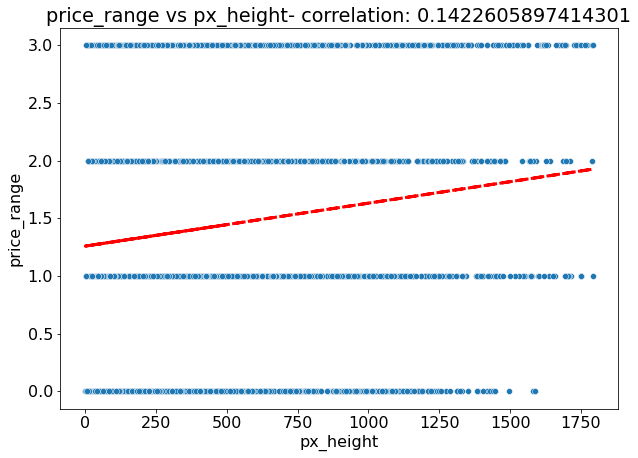

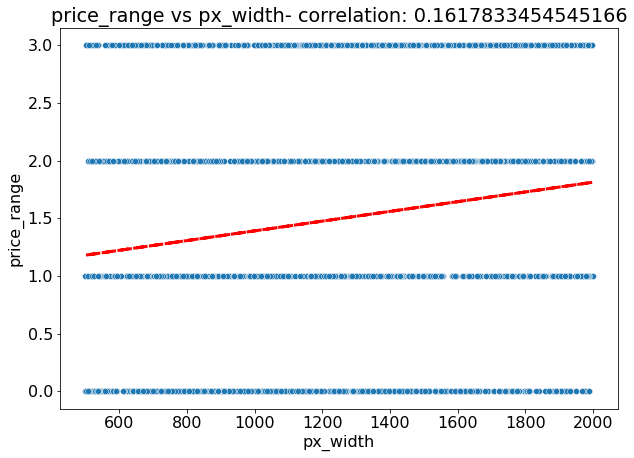

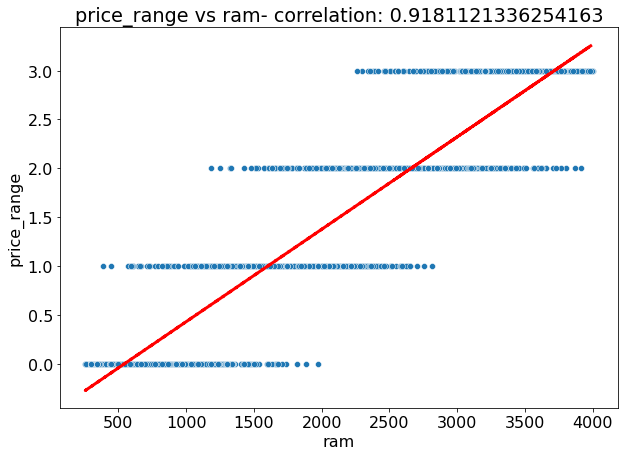

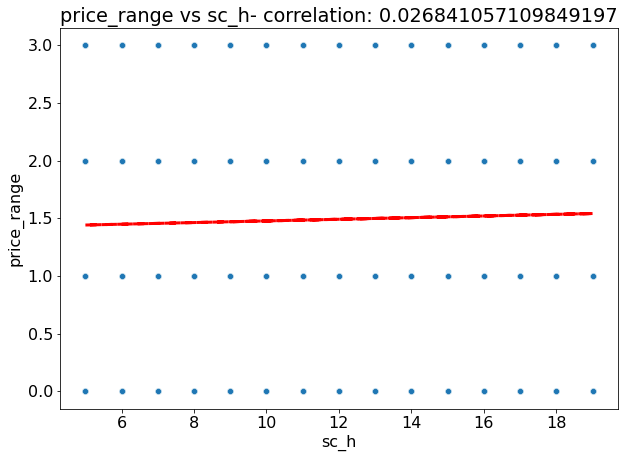

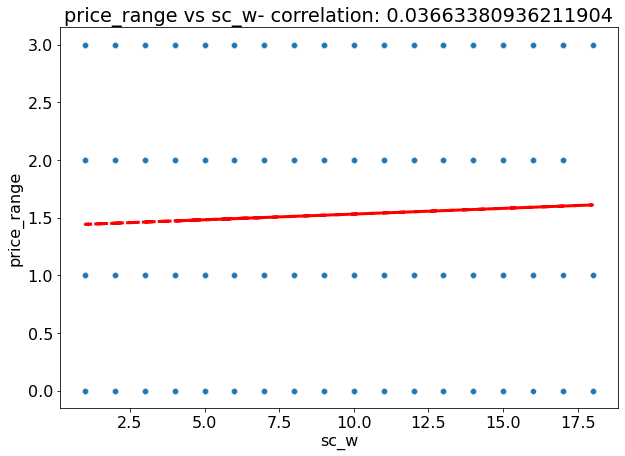

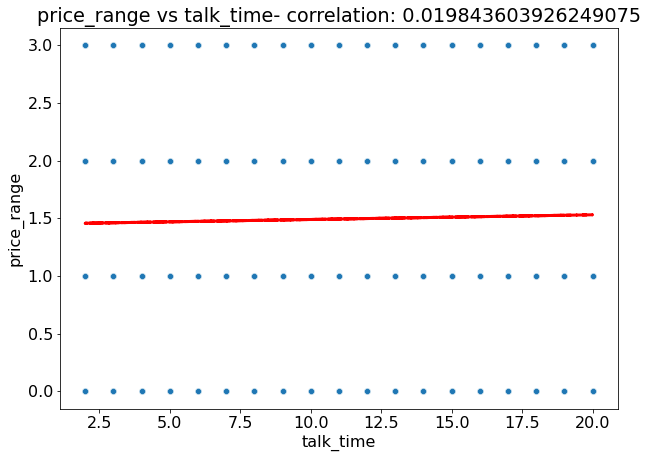

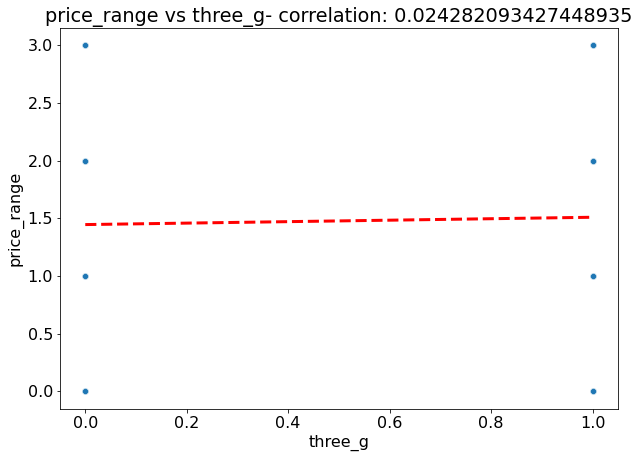

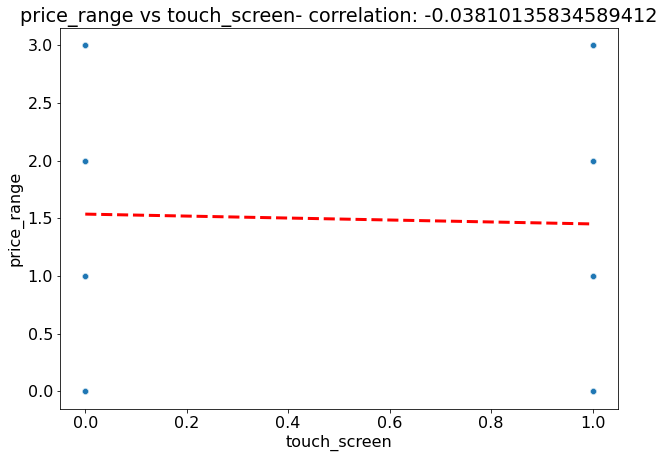

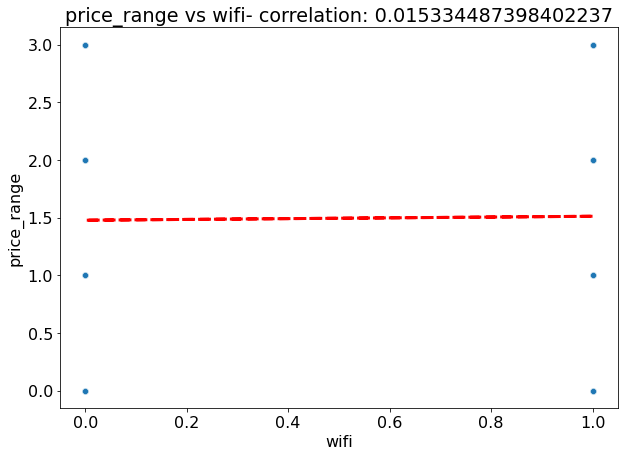

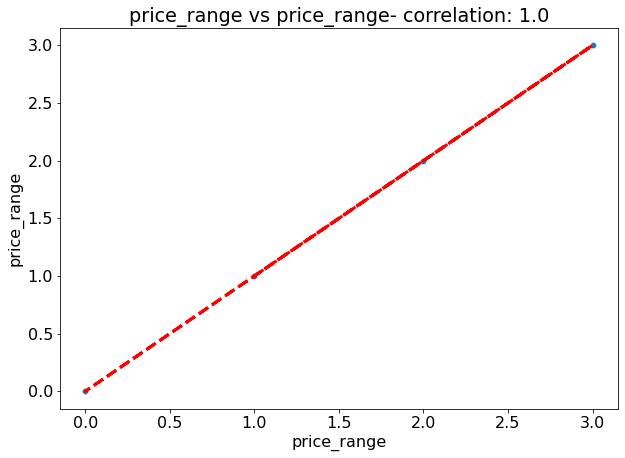

In [56]:
# scater plot with corelation between depeddnt and independt columns columns and its distribution
for i in df[1:]:                        # using for loop
   plt.figure(figsize = (10,7))                        #setting figure size
   plt.rcParams['font.size'] = '16'                    # setting font size 
   feature = df[i]
   label = df['price_range']
   
   correlation = feature.corr(label)
   sns.scatterplot(x=i,y = df['price_range'],data = df)
   plt.title('price_range vs ' + i + '- correlation: ' + str(correlation))
   z = np.polyfit(df[i], df['price_range'], 1)
   slope = np.poly1d(z)(df[i])

   plt.plot(df[i], slope, "r--", lw=3)


# CORRELATION

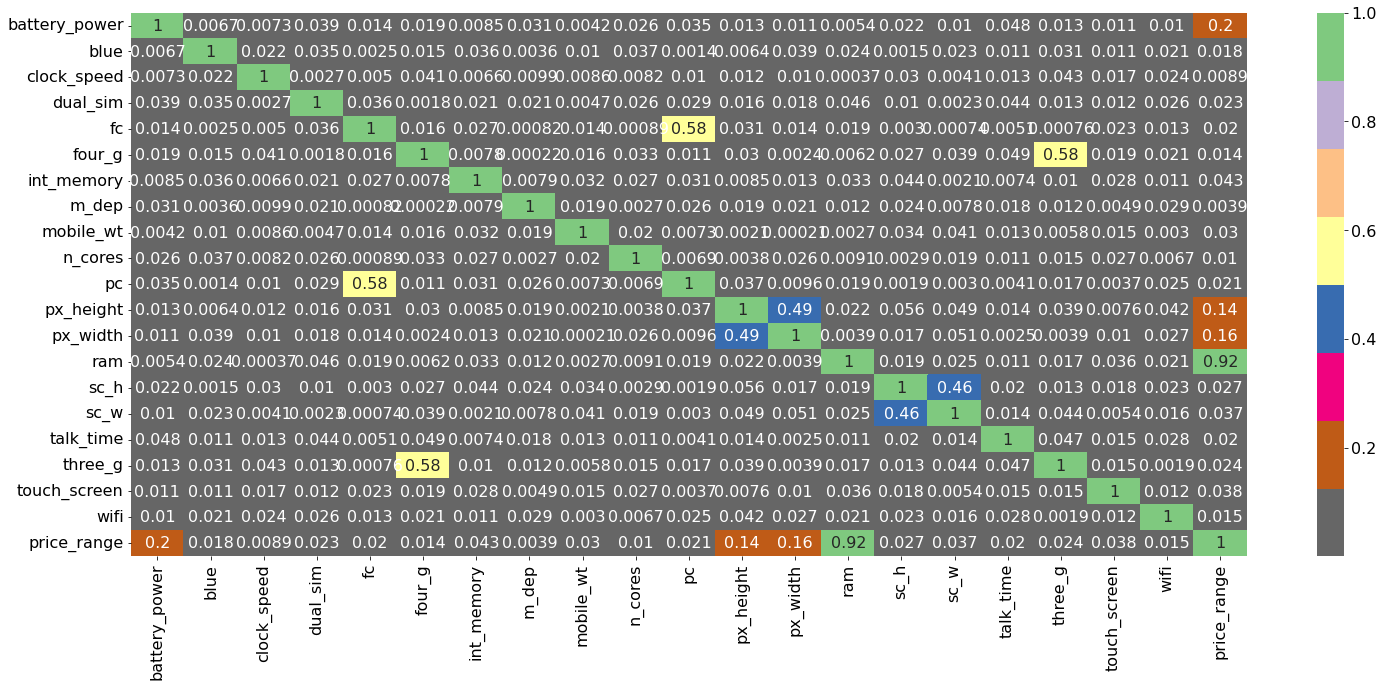

In [57]:
# correlation matrix, shown by heatmap
plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = '16'

correlation = df.corr() 
sns.heatmap(abs(correlation),annot=True, cmap=plt.cm.Accent_r,fmt='.2g')


# feature selection

# Multicollinearity

In [58]:
# checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price_range']]])

,variables,VIF
0,battery_power,8.065184
1,blue,1.982752
2,clock_speed,4.238189
3,dual_sim,2.022449
4,fc,3.033420
5,four_g,3.173388
6,int_memory,3.975906
7,m_dep,3.905632
8,mobile_wt,13.016554
9,n_cores,4.670163


In [60]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price_range','mobile_wt']]])

,variables,VIF
0,battery_power,7.791470
1,blue,1.978678
2,clock_speed,4.153621
3,dual_sim,2.010704
4,fc,3.032676
5,four_g,3.171865
6,int_memory,3.947895
7,m_dep,3.845991
8,n_cores,4.613816
9,pc,6.247315


In [61]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price_range','mobile_wt','px_width']]])

,variables,VIF
0,battery_power,7.695998
1,blue,1.978569
2,clock_speed,4.117548
3,dual_sim,1.994353
4,fc,3.032674
5,four_g,3.171235
6,int_memory,3.931985
7,m_dep,3.812686
8,n_cores,4.536286
9,pc,6.214038


In [62]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=df.drop('price_range',axis=1)
y=df["price_range"]

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [64]:
#No we Will select the  top  important features
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X,y)

In [65]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [66]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [67]:
# Check dataframe
featureScores

,Specs,Score
0,battery_power,13280.966163
1,blue,0.617492
2,clock_speed,0.825187
3,dual_sim,0.736884
4,fc,10.792275
5,four_g,1.325825
6,int_memory,78.335547
7,m_dep,0.753696
8,mobile_wt,86.994559
9,n_cores,8.258067


In [68]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(14,'Score'))

            Specs          Score
13            ram  914461.974710
11      px_height   15547.096304
0   battery_power   13280.966163
12       px_width    9174.579174
8       mobile_wt      86.994559
6      int_memory      78.335547
14           sc_h      11.811308
16      talk_time      11.772887
15           sc_w      11.020444
4              fc      10.792275
9         n_cores       8.258067
10             pc       3.519918
18   touch_screen       2.302995
5          four_g       1.325825


In [69]:
# 14 features with highest chi squared statistic are selected as independent variables.
X=df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc','touch_screen','four_g']]

# dependent varaible
y=df['price_range']

In [72]:
X.shape, y.shape

((1961, 14), (1961,))

In [70]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [73]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1470, 14)
(491, 14)
(1470,)
(491,)


In [74]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [75]:
X_train_scaled

array([[ 1.63137223, -1.41089432,  1.38461667, ..., -0.56978483,
        -0.98246661,  0.96654567],
       [ 1.44679801, -0.51971396, -0.63835377, ...,  0.13658979,
         1.0178463 , -1.03461226],
       [ 1.35219213, -1.17993397,  0.73462053, ..., -1.62934676,
        -0.98246661,  0.96654567],
       ...,
       [ 1.71670303, -0.12078244, -0.4581794 , ...,  0.8429644 ,
        -0.98246661,  0.96654567],
       [ 1.46256566, -0.61069834,  1.06075894, ...,  0.8429644 ,
         1.0178463 ,  0.96654567],
       [ 0.14550339, -1.19859743,  1.60584342, ..., -0.56978483,
         1.0178463 , -1.03461226]])

In [76]:
X_test_scaled


array([[ 0.94687086,  1.7129028 , -1.42291051, ..., -0.56978483,
        -0.98246661, -1.03461226],
       [ 1.69629784, -1.36190273, -1.02150939, ...,  0.31318344,
         1.0178463 ,  0.96654567],
       [-1.10663327,  0.00752887,  0.65707713, ...,  0.31318344,
         1.0178463 , -1.03461226],
       ...,
       [-1.40529105,  0.02852526,  1.09268858, ...,  1.19615171,
        -0.98246661,  0.96654567],
       [ 1.65548746,  0.69574406, -1.31571816, ..., -1.4527531 ,
         1.0178463 ,  0.96654567],
       [ 1.4885359 , -0.46605651, -1.24957821, ..., -1.27615945,
         1.0178463 , -1.03461226]])

In [78]:
#Logistic Regression
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [80]:
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_logi = lr.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred_logi)
print('confusion matrix:\n',cm)


confusion matrix:
 [[133   2   0   0]
 [  3 123   6   0]
 [  0   4  83   6]
 [  0   0   1 130]]


In [81]:
#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred_logi)
print('accuracy score = ',lra)

accuracy score =  0.955193482688391


In [82]:
y_pred_train_logi = lr.predict(X_train_scaled)

In [83]:
print('Variance score for the Logistic Regressor raw is : %.2f' % lr.score(X_test_scaled, y_test))

Variance score for the Logistic Regressor raw is : 0.96
